In [12]:
import sys, time, http.client
from PyQt5.QtGui import QPixmap
from PyQt5.QtCore import QTimer, Qt
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io

%matplotlib inline

In [13]:
# Creamos una clase que lo contenga todo:
# - Conectar con el servidor y comprobar que conecta.
# - Stream de imagenes: Que tire bien, para ello queremos guardar una imagen de cada X.
# - Mandar acciones a Johnnie 6: Probar a mandar alguna acción al coche a ver qué tal funciona

# Extra: Acceder al codigo del servidor para ver como modificar las acciones posibles.

class QueryImage:
    """Query Image

    Query images form http. eg: queryImage = QueryImage(HOST)

    Attributes:
        host, port. Port default 8080, post need to set when creat a new object

    """

    def __init__(self, host, port=8080, argv="/?action=snapshot"):
        # default port 8080, the same as mjpg-streamer server
        self.host = host
        self.port = port
        self.argv = argv
        print(self.argv)

    def queryImage(self):
        """Query Image
        Query images form http.eg:data = queryImage.queryImage()
        Args:
            None
        Return:
            returnmsg.read(), http response data
        """
        http_data = http.client.HTTPConnection(self.host, self.port)
        http_data.putrequest('GET', self.argv)
        http_data.putheader('Host', self.host)
        http_data.putheader('User-agent', 'python-http.client')
        http_data.putheader('Content-type', 'image/jpeg')
        print(http_data)

        http_data.endheaders()

        returnmsg = http_data.getresponse()
        print(returnmsg.msg)
        return returnmsg.read()


class Connect():

    def __init__(self, server_ip, server_port):
        self.server_ip = server_ip
        self.server_port = server_port
        self.server_url = 'http://' + server_ip + ':' + server_port + '/'
        print(self.server_url)
        
    def connection_ok(self):
        """Check if connection is ok
        Post a request to server, if connection ok, server will return http response 'ok'
        Args:
            none
        Returns:
            if connection ok, return True
            if connection not ok, return False
        """
        cmd = 'connection_test'
        url = self.server_url + cmd + "/"
        print('url: %s' % url)
        # if server find there is 'connection_test' in request url, server will response 'Ok'
        try:
            r = requests.get(url)
            if r.text == 'OK':
                return True
        except:
            return False

    def start_stream(self):
        self.queryImage = QueryImage(self.server_ip)  # Hace la conexion con el servidor
        data = self.queryImage.queryImage()  # Recibe la imagen del servidor (en bits)
        if not data:
            print('No data received')
            return None
        else:
            image = np.array(Image.open(io.BytesIO(data)))
        return image

http://192.168.1.40:8000/
/?action=snapshot
Connection: close
Server: MJPG-Streamer/0.2
Cache-Control: no-store, no-cache, must-revalidate, pre-check=0, post-check=0, max-age=0
Pragma: no-cache
Expires: Mon, 3 Jan 2000 12:34:56 GMT
Content-type: image/jpeg
X-Timestamp: 0.000000


(480, 640, 3)


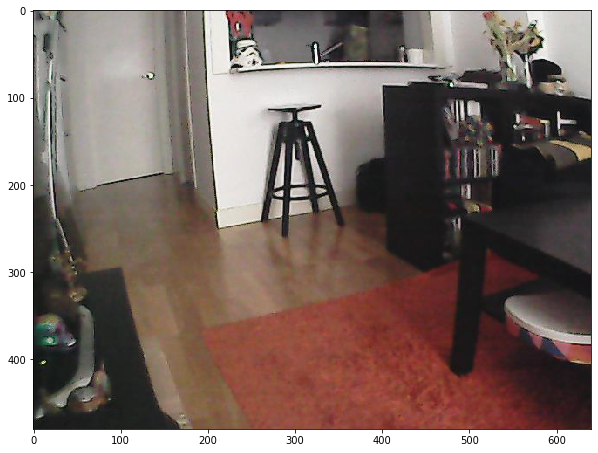

In [14]:
server_ip = "192.168.1.40"
server_port = "8000"

connection = Connect(server_ip, server_port)
#connection_test = connection.connection_ok()
image = connection.start_stream()
print(image.shape)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()